In [2]:
import os, sys
import pickle

import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from get_forecasting_model import *

In [3]:
# df = pd.read_csv(os.path.join(project_root, 'data', 'processed', f"train.csv"))

df = pd.read_csv('D:/Study/Education/Projects/DataFlow/DataFlow_2026/data/processed/test.csv')

In [29]:
X

,time,size,Error,No Change,Not Found,Redirected,Success,anomaly,log_time
0,1995-08-23 00:00:00,8924017.0,0,74,5,12,352,False,16.004257
1,1995-08-23 00:15:00,7176447.0,0,23,2,5,383,False,15.786315
2,1995-08-23 00:30:00,5208197.0,0,32,4,2,275,False,15.465744
3,1995-08-23 00:45:00,7282676.0,0,19,1,4,310,False,15.801009
4,1995-08-23 01:00:00,3863356.0,0,14,7,3,166,False,15.167047
...,...,...,...,...,...,...,...,...,...
859,1995-08-31 22:45:00,14340278.0,0,69,3,17,655,False,16.478583
860,1995-08-31 23:00:00,13727524.0,0,52,12,19,579,False,16.434913
861,1995-08-31 23:15:00,13767112.0,0,77,7,30,573,False,16.437793
862,1995-08-31 23:30:00,12006529.0,0,36,6,37,587,False,16.300961


In [6]:
df.head(2)

,ip,identd,user,time,request,status,size,resource,protocol,utc,status_label
0,199.72.81.55,-,-,1995-07-01 00:00:01,GET /history/apollo/ HTTP/1.0,200,6245.0,/history/apollo/,HTTP/1.0,UTC - 04,Success
1,unicomp6.unicomp.net,-,-,1995-07-01 00:00:06,GET /shuttle/countdown/ HTTP/1.0,200,3985.0,/shuttle/countdown/,HTTP/1.0,UTC - 04,Success


In [4]:
predictor = Predictor('sarimax', '15min')

X, y, y_pred = predictor.get_prediction(df)

Using: cpu


In [5]:
y_pred = np.exp(y_pred)
y_true = np.exp(y)

# y_true = y

r2 = r2_score(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"R^2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

R^2: 0.7581
RMSE: 2802318.0564
MAE: 2089145.6949
MAPE: 0.2422


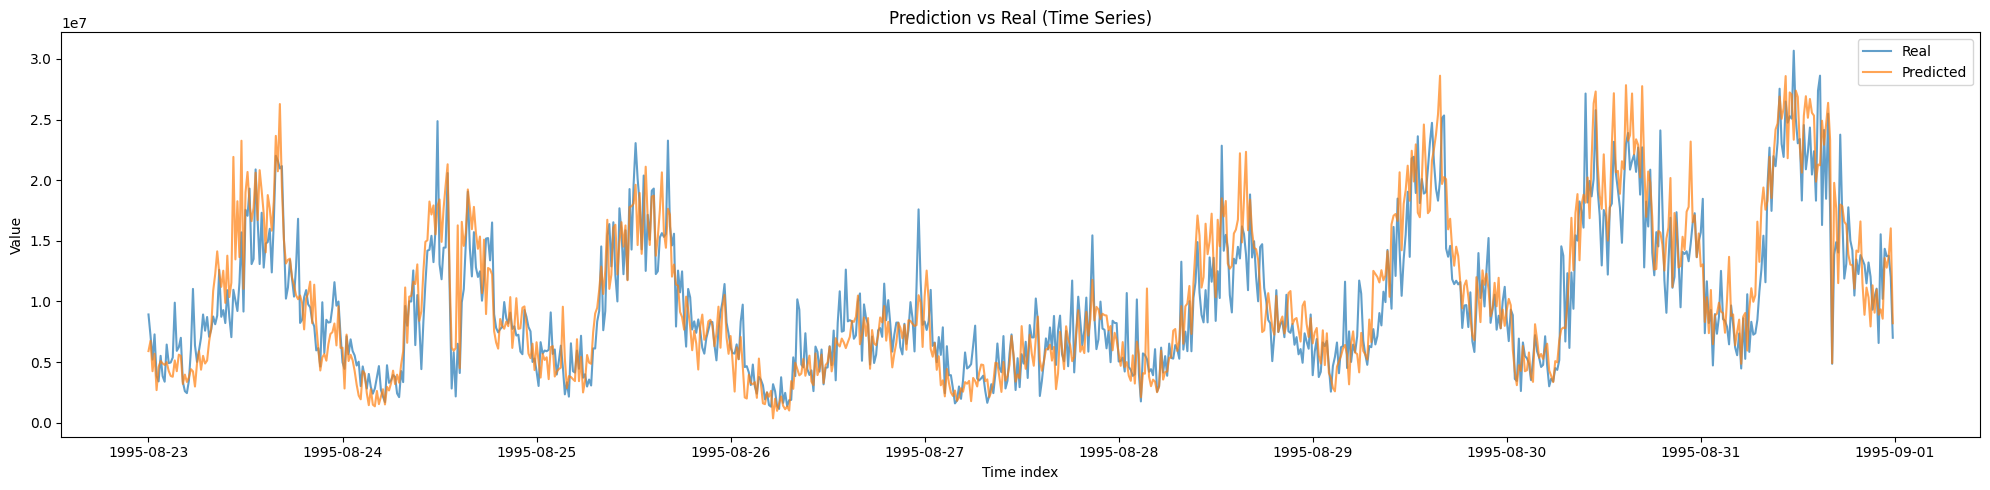

In [6]:
t = X['time']

plt.figure(figsize=(20, 5))
plt.plot(t, y_true, label="Real", alpha=0.7)
plt.plot(t, y_pred, label="Predicted", alpha=0.7)

plt.title("Prediction vs Real (Time Series)")
plt.xlabel("Time index")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()